TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

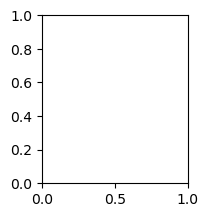

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from polyreg import PolynomialRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import LeaveOneOut

from polyreg import learningCurve
def plotLearningCurve(errorTrain, errorTest, regLambda, degree):
    '''
        plot computed learning curve
    '''
    minX = 3
    maxY = max(errorTest[minX+1:])

    xs = np.arange(len(errorTrain))
    plt.plot(xs, errorTrain, 'r-o')
    plt.hold(True)
    plt.plot(xs, errorTest, 'b-o')
    plt.plot(xs, np.ones(len(xs)), 'k--')
    plt.hold(False)
    plt.legend(['Training Error', 'Testing Error'], loc = 'best')
    plt.title('Learning Curve (d='+str(degree)+', lambda='+str(regLambda)+')')
    plt.xlabel('Training samples')
    plt.ylabel('Error')
    plt.yscale('log')
    plt.ylim((0,maxY))
    plt.xlim((minX,10))


def generateLearningCurve(X, y, degree, regLambda):
    '''
        computing learning curve via leave one out CV
    '''

    n = len(X)
    
    errorTrains = np.zeros((n, n-1))
    errorTests = np.zeros((n, n-1))
    
    loo = LeaveOneOut()
    itrial = 0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        (errTrain, errTest) = learningCurve(X_train, y_train, X_test, y_test, regLambda, degree)

        errorTrains[itrial, :] = errTrain
        errorTests[itrial, :] = errTest
        itrial += 1

    errorTrain = errorTrains.mean(axis=0)
    errorTest = errorTests.mean(axis=0)

    plotLearningCurve(errorTrain, errorTest, regLambda, degree)
filePath = "polydata.dat"
file = open(filePath,'r')
allData = np.loadtxt(file, delimiter=',')

X = allData[:, 0]
y = allData[:, 1]

# generate Learning curves for different params
plt.subplot(2, 3, 1)
generateLearningCurve(X, y, 1, 0);
plt.subplot(2, 3, 2)
generateLearningCurve(X, y, 4, 0);
plt.subplot(2, 3, 3)
generateLearningCurve(X, y, 8, 0);
plt.subplot(2, 3, 4)
generateLearningCurve(X, y, 8, .1);
plt.subplot(2, 3, 5)
generateLearningCurve(X, y, 8, 1);
plt.subplot(2, 3, 6)
generateLearningCurve(X, y, 8, 100);
plt.show()

C:\Users\DucLe\AppData\Local\Temp\ipykernel_15200\1397907407.py:19: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0,maxY))


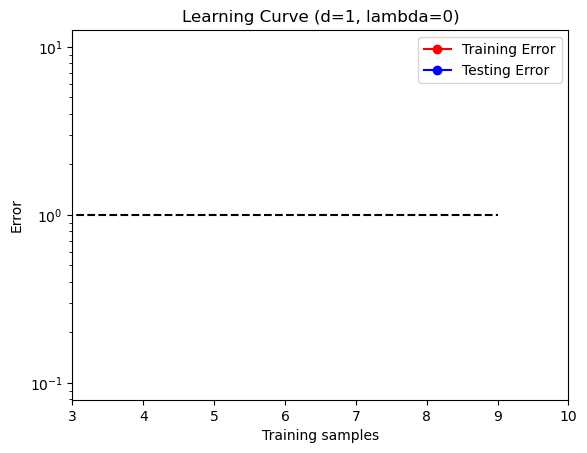

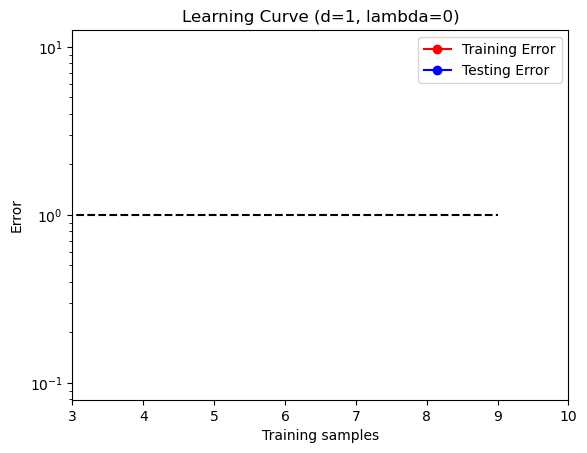

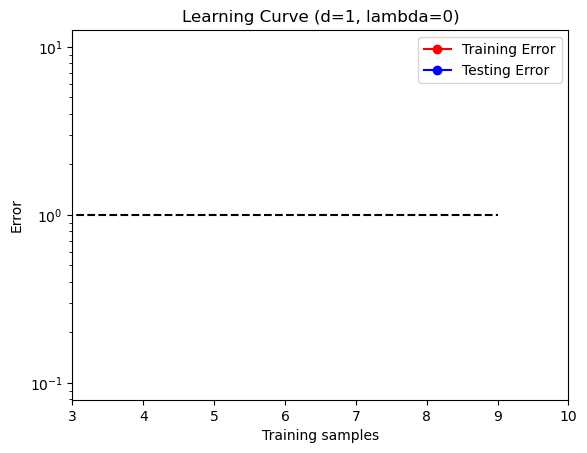

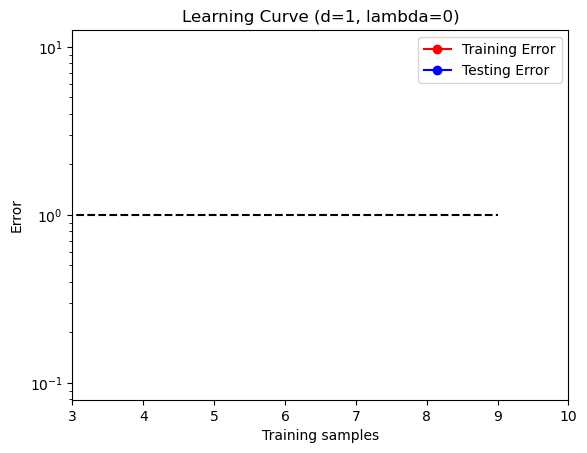

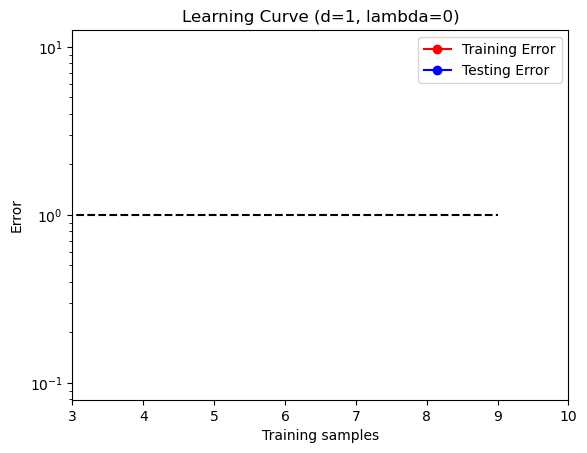

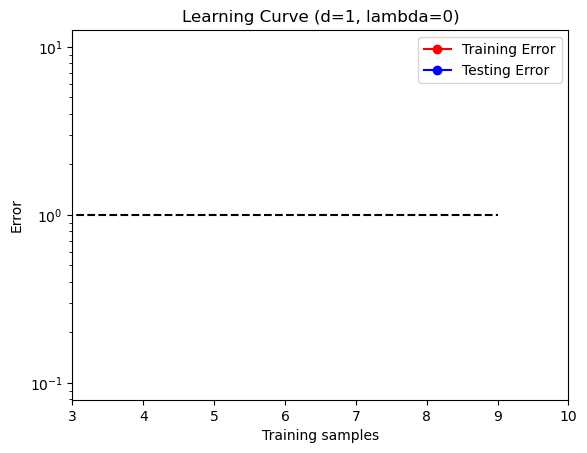

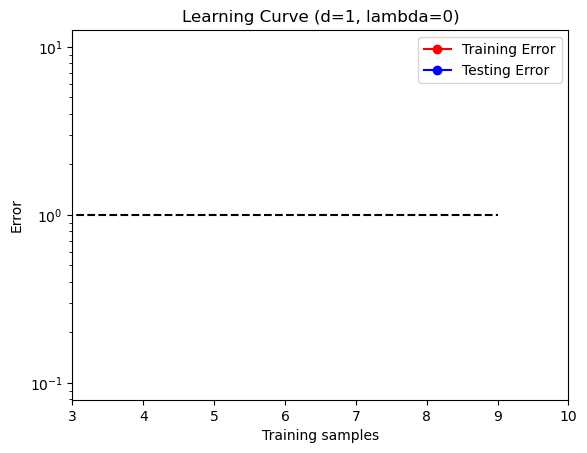

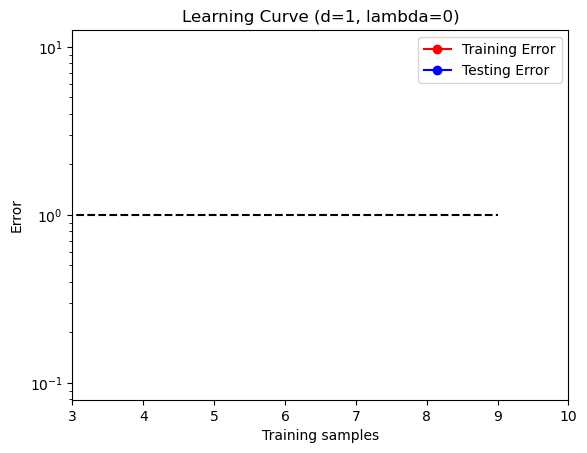

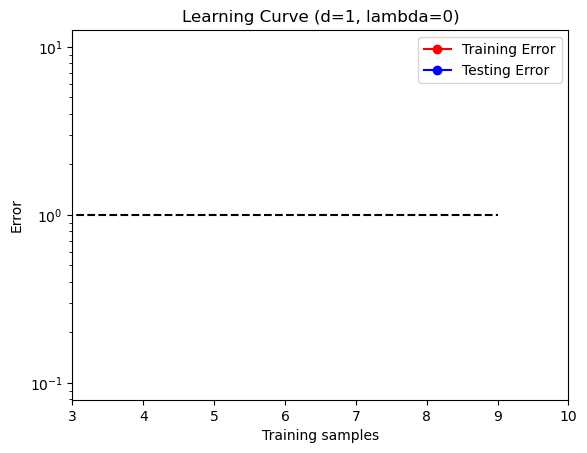

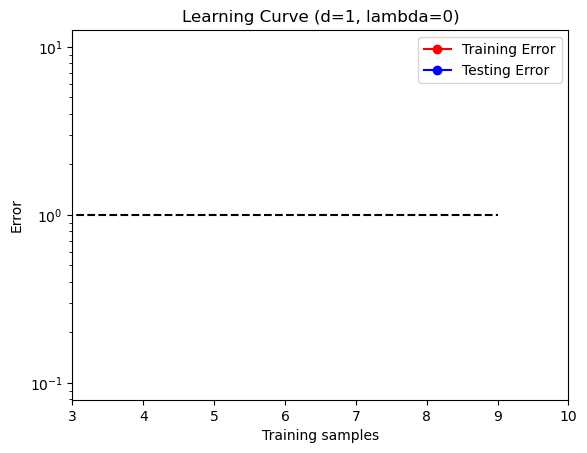

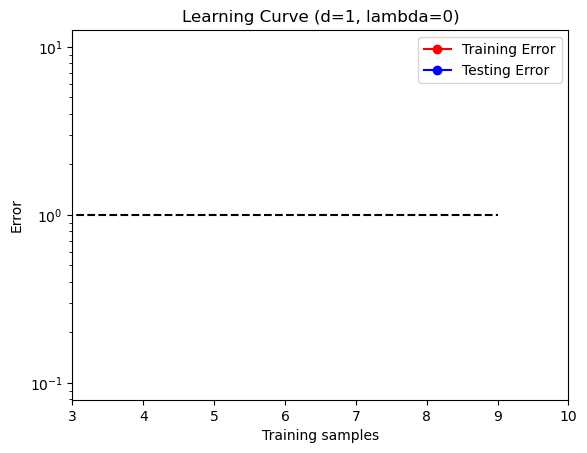

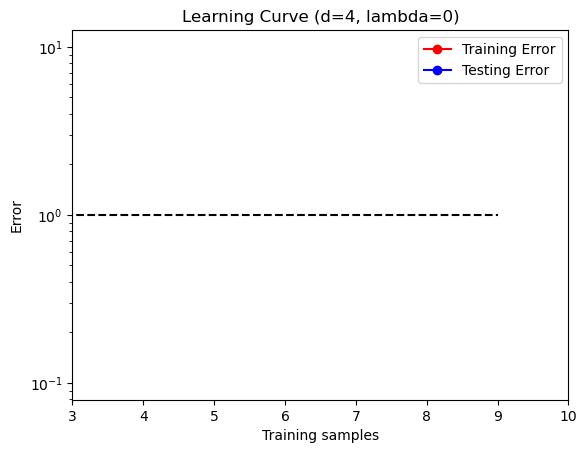

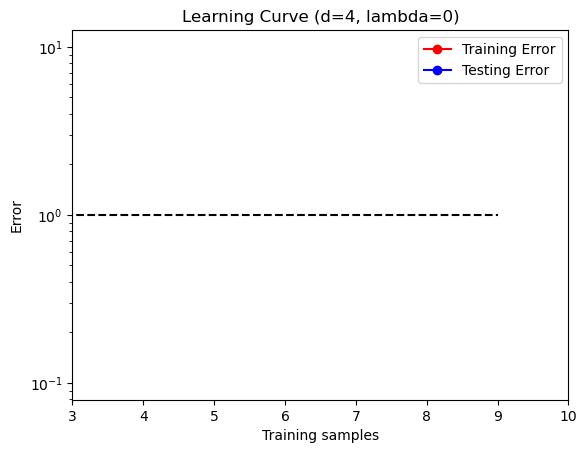

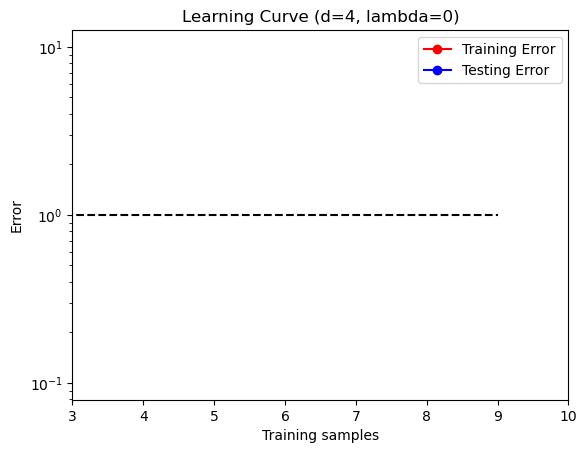

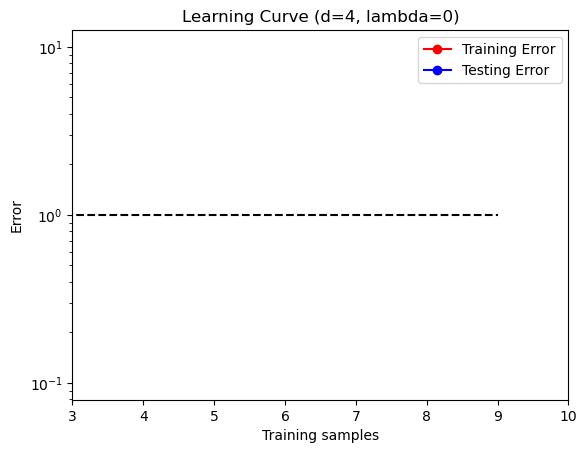

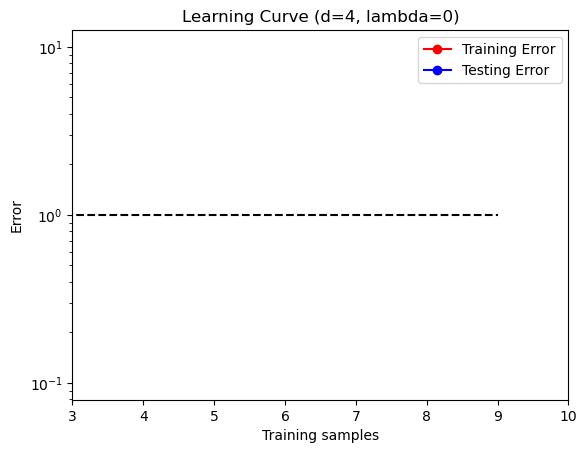

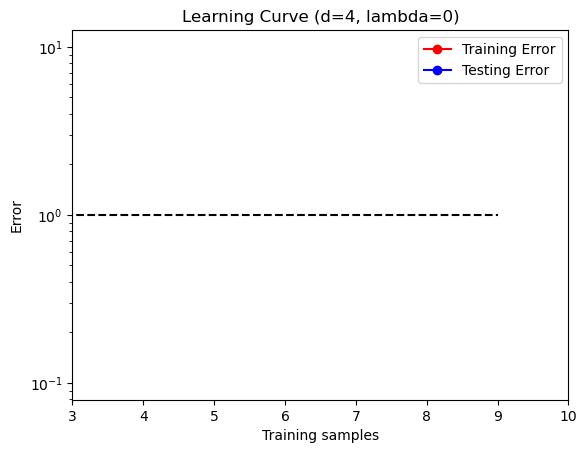

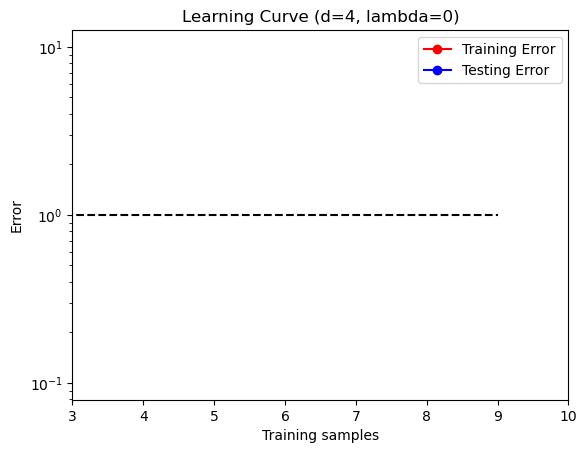

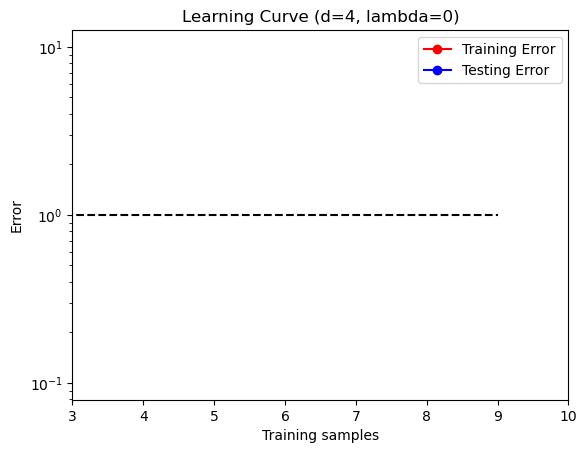

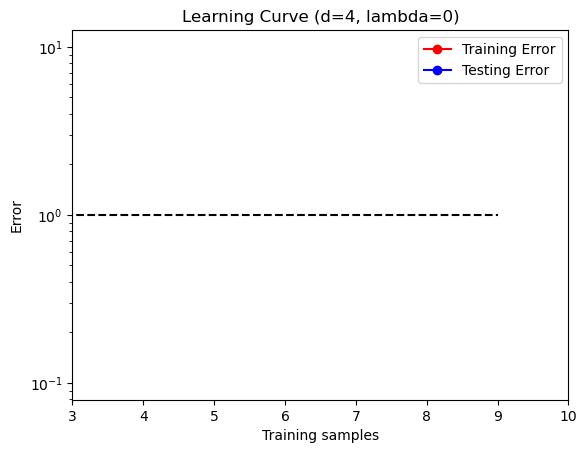

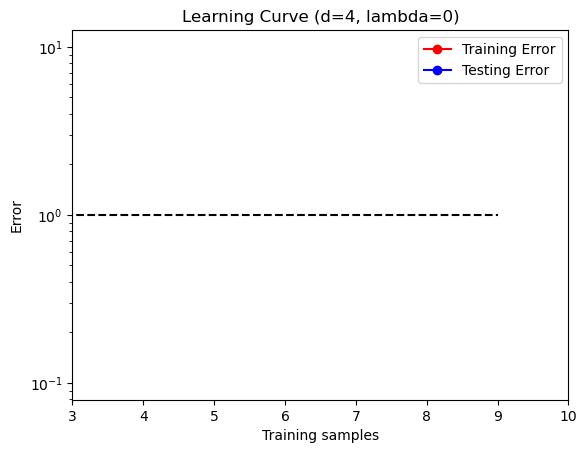

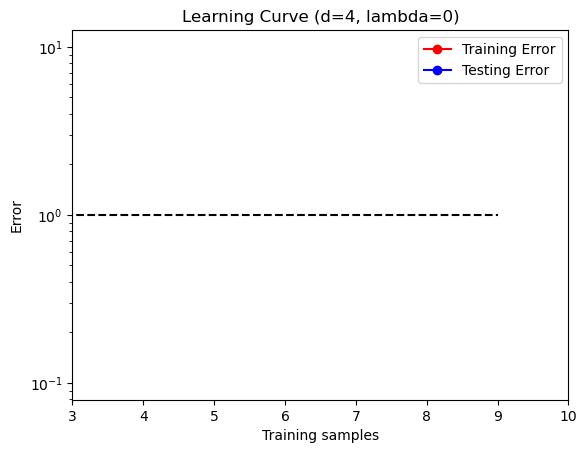

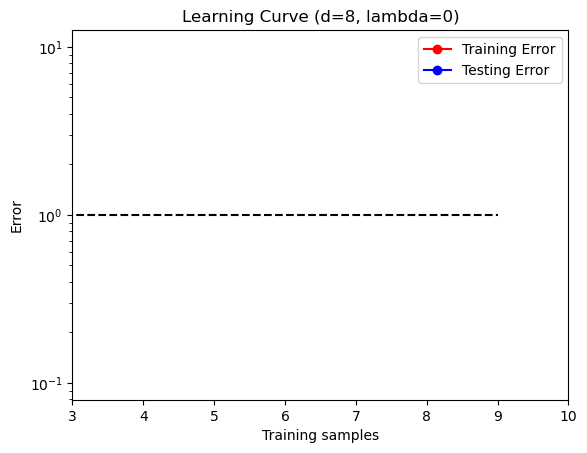

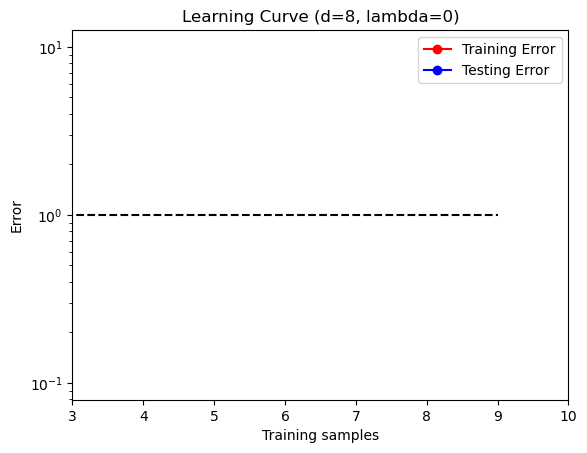

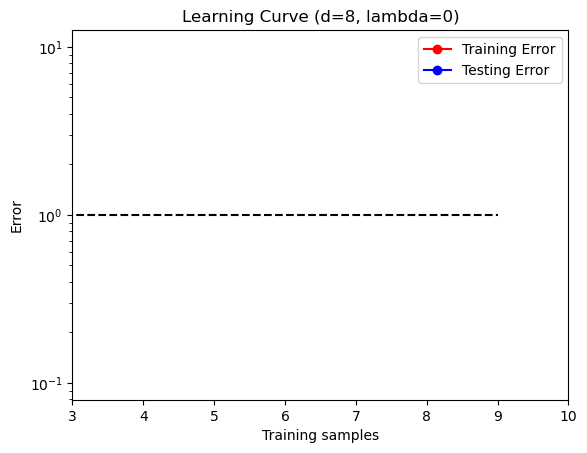

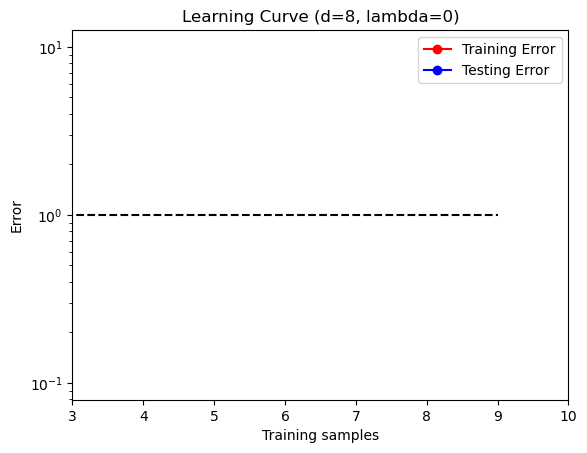

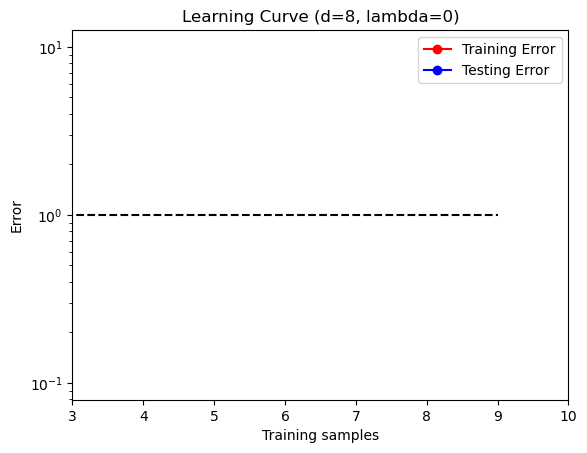

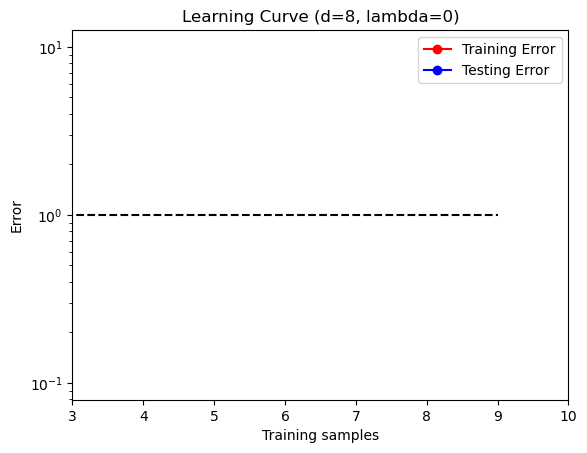

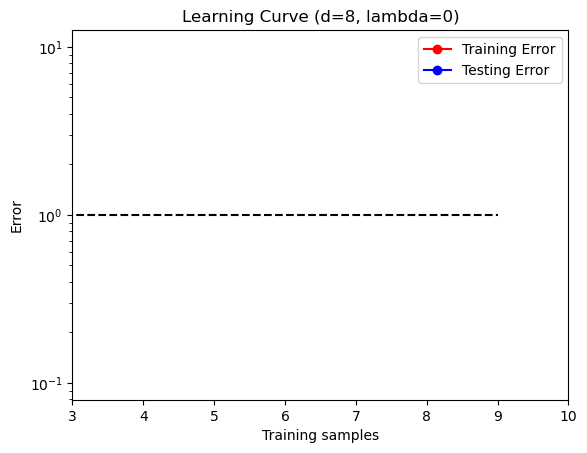

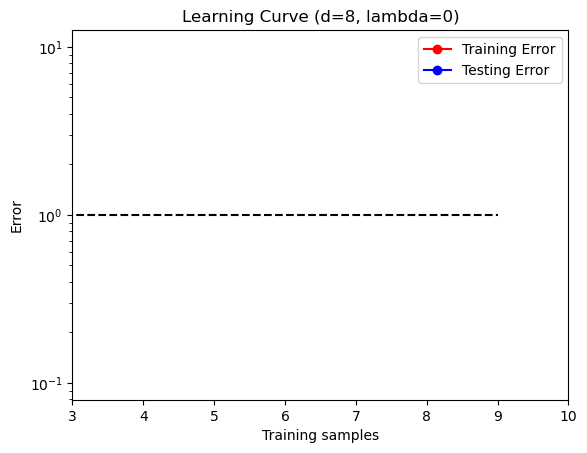

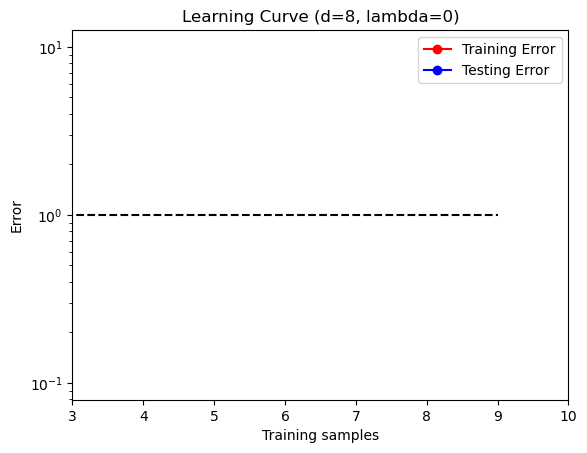

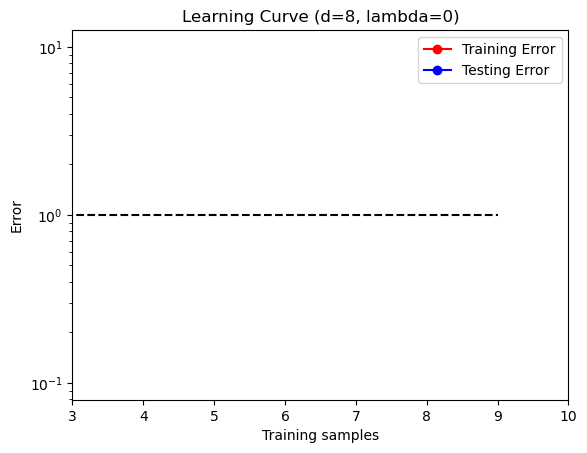

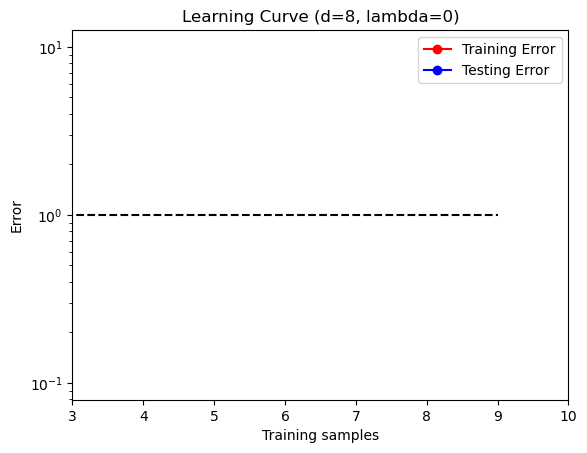

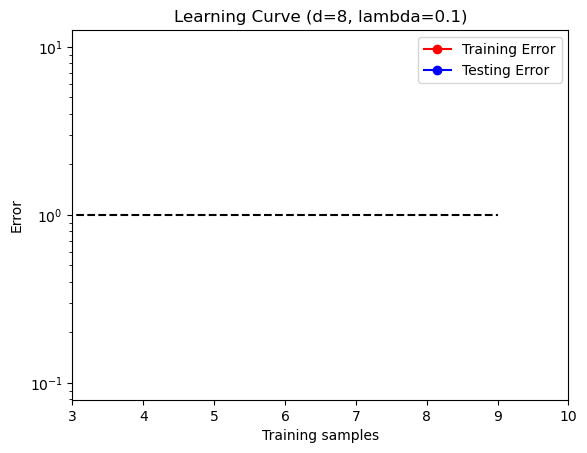

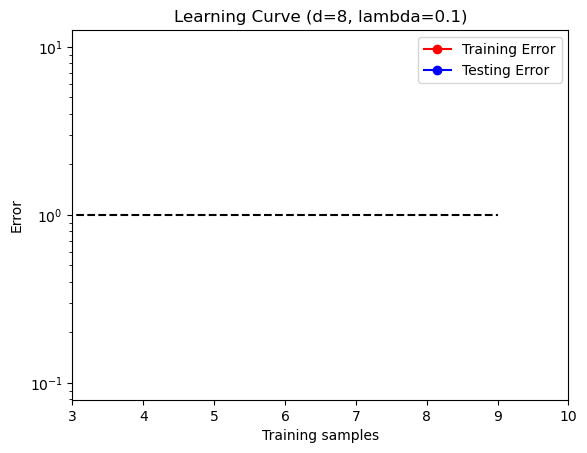

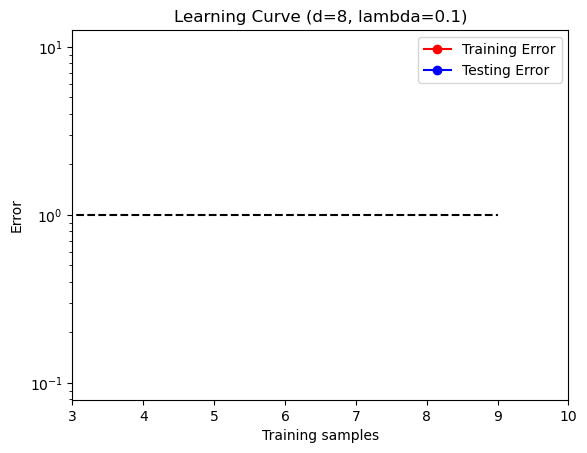

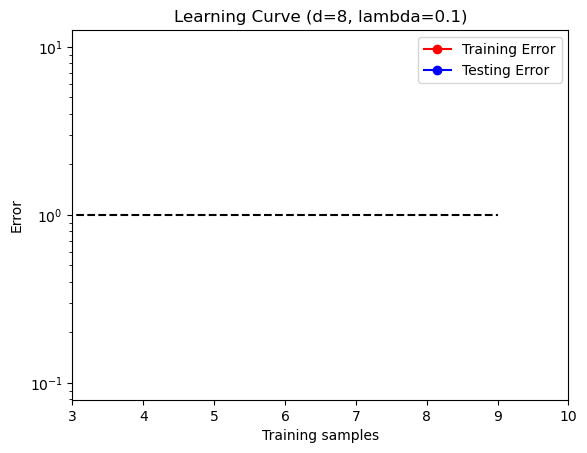

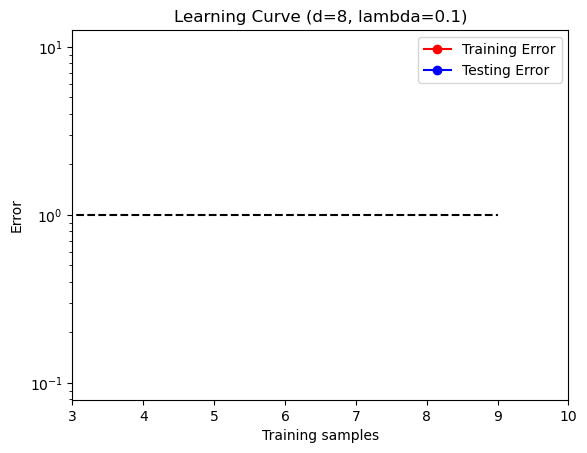

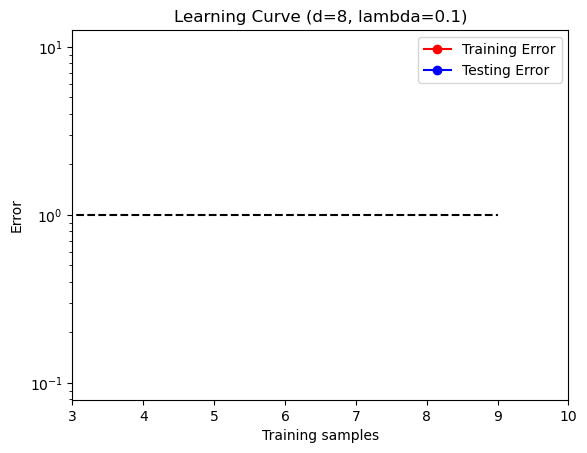

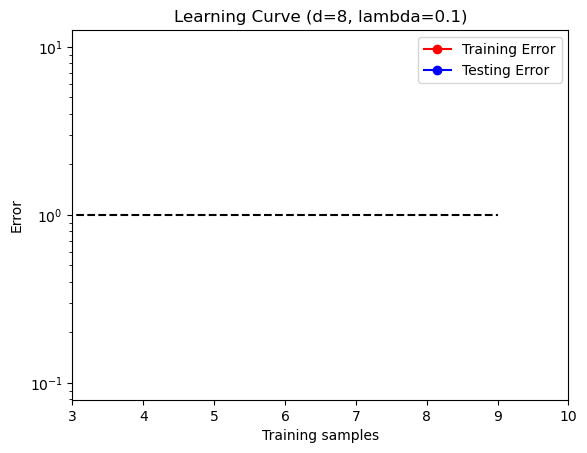

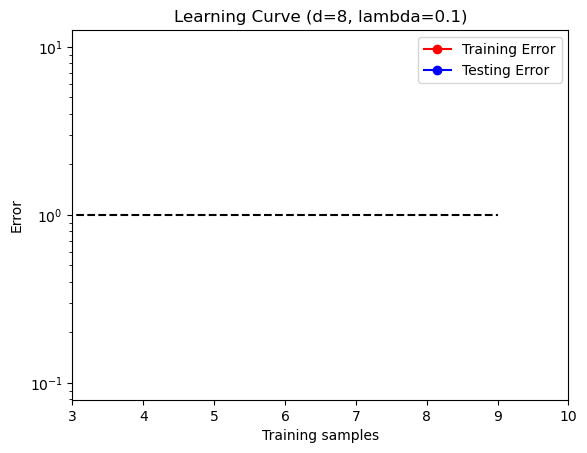

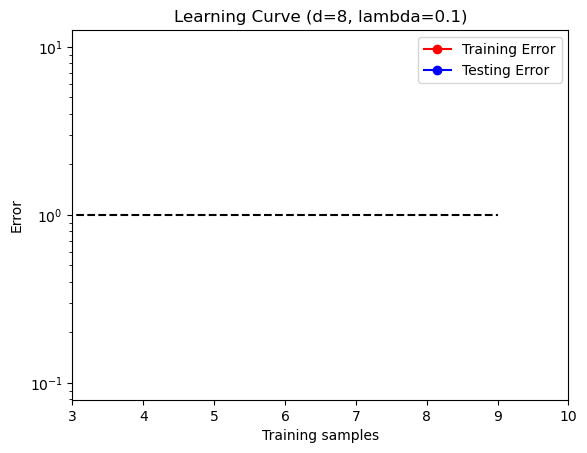

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from polyreg import PolynomialRegression
from sklearn.model_selection import LeaveOneOut

def plotLearningCurve(errorTrain, errorTest, regLambda, degree):
    minX = 3
    maxY = max(errorTest[minX+1:])

    xs = np.arange(len(errorTrain))
    plt.plot(xs, errorTrain, 'r-o')
    plt.plot(xs, errorTest, 'b-o')
    plt.plot(xs, np.ones(len(xs)), 'k--')
    plt.legend(['Training Error', 'Testing Error'], loc='best')
    plt.title('Learning Curve (d='+str(degree)+', lambda='+str(regLambda)+')')
    plt.xlabel('Training samples')
    plt.ylabel('Error')
    plt.yscale('log')
    plt.ylim((0,maxY))
    plt.xlim((minX,10))
    plt.show()

def learningCurve(Xtrain, Ytrain, Xtest, Ytest, regLambda, degree):
    n = len(Xtrain)
    
    errorTrain = np.zeros(n)
    errorTest = np.zeros(n)
    
    for i in range(2, n):
        Xtrain_subset = Xtrain[:i]
        Ytrain_subset = Ytrain[:i]
        
        model = PolynomialRegression(degree, regLambda)
        model.fit(Xtrain_subset, Ytrain_subset)
        
        predictTrain = model.predict(Xtrain_subset)
        if predictTrain is None or Ytrain_subset is None or len(predictTrain) != len(Ytrain_subset):
            continue
        
        errTrain = np.subtract(predictTrain, Ytrain_subset)
        errorTrain[i] = np.multiply(errTrain, errTrain).mean()
        
        predictTest = model.predict(Xtest)
        if predictTest is None or Ytest is None or len(predictTest) != len(Ytest):
            continue
        
        errTest = np.subtract(predictTest, Ytest)
        errorTest[i] = np.multiply(errTest, errTest).mean()
    
    return (errorTrain, errorTest)


def generateLearningCurve(X, y, degree, regLambda):
    '''
    Compute learning curve via leave one out CV
    '''
    loo = LeaveOneOut()
    itrial = 0
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        (errTrain, errTest) = learningCurve(X_train, y_train, X_test, y_test, regLambda, degree)

        plotLearningCurve(errTrain, errTest, regLambda, degree)

filePath = "polydata.dat"
allData = np.loadtxt(filePath, delimiter=',')

X = allData[:, 0]
y = allData[:, 1]

# Generate Learning curves for different params
generateLearningCurve(X, y, 1, 0)
generateLearningCurve(X, y, 4, 0)
generateLearningCurve(X, y, 8, 0)
generateLearningCurve(X, y, 8, 0.1)
generateLearningCurve(X, y, 8, 1)
generateLearningCurve(X, y, 8, 100)
